Индивидуальный проект: **Название проекта**

Автор: **Пушков Константин**

Проверяющий: **ФИО**

Ссылка на датасет:https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

### Примерный план (подстроить план под вашу задачу)
1. Цель и задачи исследования
2. Описание набора данных
3. Разведочный анализ данных (англ. exploratory data analysis, EDA) + визуализация
4. Генерация и селекция признаков + нормализация
5. Выбор метода/алгоритма, модели, архитектуры (для НС)
6. Выбор метрики оценки качества (RMSE, R^2)
7. Генерация наборов для обучения, тестирования и валидации
8. Развертывание и работа модели, визуализация результатов
9. Выводы


**Предсказать цену дома с помощью регрессии**


## Описание набора данных

Данные взяты из: 

[Ссылка на данные](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)


### Описание данных

Датасет представлен в виде каких файлов? Сколько их?
Как собирались данные? Для чего — просто коротко о датасете.
Описать объем данных.

- Выборка включает __  записей и __ признаков (строки и столбцы соответственно).
- Целевая переменная **название целевой переменной** — что обозначает

- Количественные переменные:
    - **price** — цена дома;
    - **bedrooms** — количесвто спален;
    - **bathrooms** — количество ванных комнат, где 0,5 соответствует комнате с туалетом, но без душа;
    - **sqft_living** — квадратные футы внутренней жилой площади;
    - **sqft_lot** — квадратные футы наземного пространства;
    - **floors** — количесвто этажей;
    - **sqft_above** — квадратные футы внутреннего жилого пространства, которое находится над уровнем земли;
    - **sqft_basement** — квадратные футы внутреннего жилого пространства ниже уровня земли;
    - **yr_built** — год постройки дома;
    - **zipcode** — в каком почтовом индексе находится дом;
    - **lat** — Широта;
    - **long** — Долгота;
    - **sqft_living15** — квадратные метры внутренней жилой площади жилья на 15 ближайших соседей;
    - **sqft_lot15** — площадь земельных участков ближайших 15 соседей;
    
    
- Категориальные переменные:

    - **waterfront** — есть ли выход на набережную или нет.;
    - **view** — индекс от 0 до 4 того, насколько хорошим был вид на недвижимость;
    - **condition** — показатель от 1 до 5 по состоянию квартиры;
    - **grade** — показатель от 1 до 13, где 1-3 не соответствует уровню строительства и проектирования, 7 - средний уровень строительства и дизайна, а 11-13 - высокий уровень качества строительства и дизайна;
    

Если вы на этом шаге уже не планируете использовать какой-то признак, напишите об этом. 

##  Разведочный анализ данных (англ. exploratory data analysis, EDA) + визуализация


- выгрузка данных
- визуализация
- взаимодействие между параметрами (корреляция и прочее)
- проверка на нормальность
- закономерности, "инсайты", особенности данных

In [1]:
import warnings

import pandas as pd
import seaborn as sb
import numpy as np
import pylab as plt
%matplotlib inline
import pylab as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error



### Выгрузка данных

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print(df.shape)
print(df.columns.values)

(21613, 21)
['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


Уберём столбцы date и id, которые не имеют для нас смысла

In [5]:
df = df.drop(['id','date'], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Основные харакетристики переменных в численном и визуальном представлении

In [6]:
print(df.shape)

(21613, 19)


Датафрейм имеет 21613 строк и 19
признаков. Посмотрим на информацию о каждом признаке.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

Все стлбцы не имеют пропусков, что благополучно скажется на работе с датасетом

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Взаимодействие между параметрами

Давайте теперь проанализируем взаимосвязь между независимыми переменными, доступными в наборе данных, и зависимой переменной, которую мы пытаемся предсказать (то есть ценой). Этот анализ должен дать некоторые интересные идеи для наших моделей регрессии.

Мы будем использовать диаграммы рассеяния и коэффициенты корреляции для изучения потенциальных связей между переменными.

Text(0.5, 0, 'Цена')

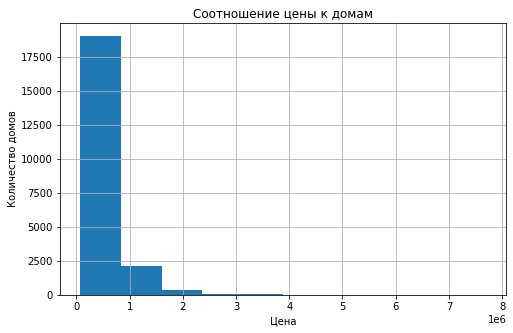

In [9]:
df.hist('price',figsize=(8,5))
plt.title('Соотношение цены к домам')
plt.ylabel('Количество домов')
plt.xlabel("Цена")

D:\Programs\Anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


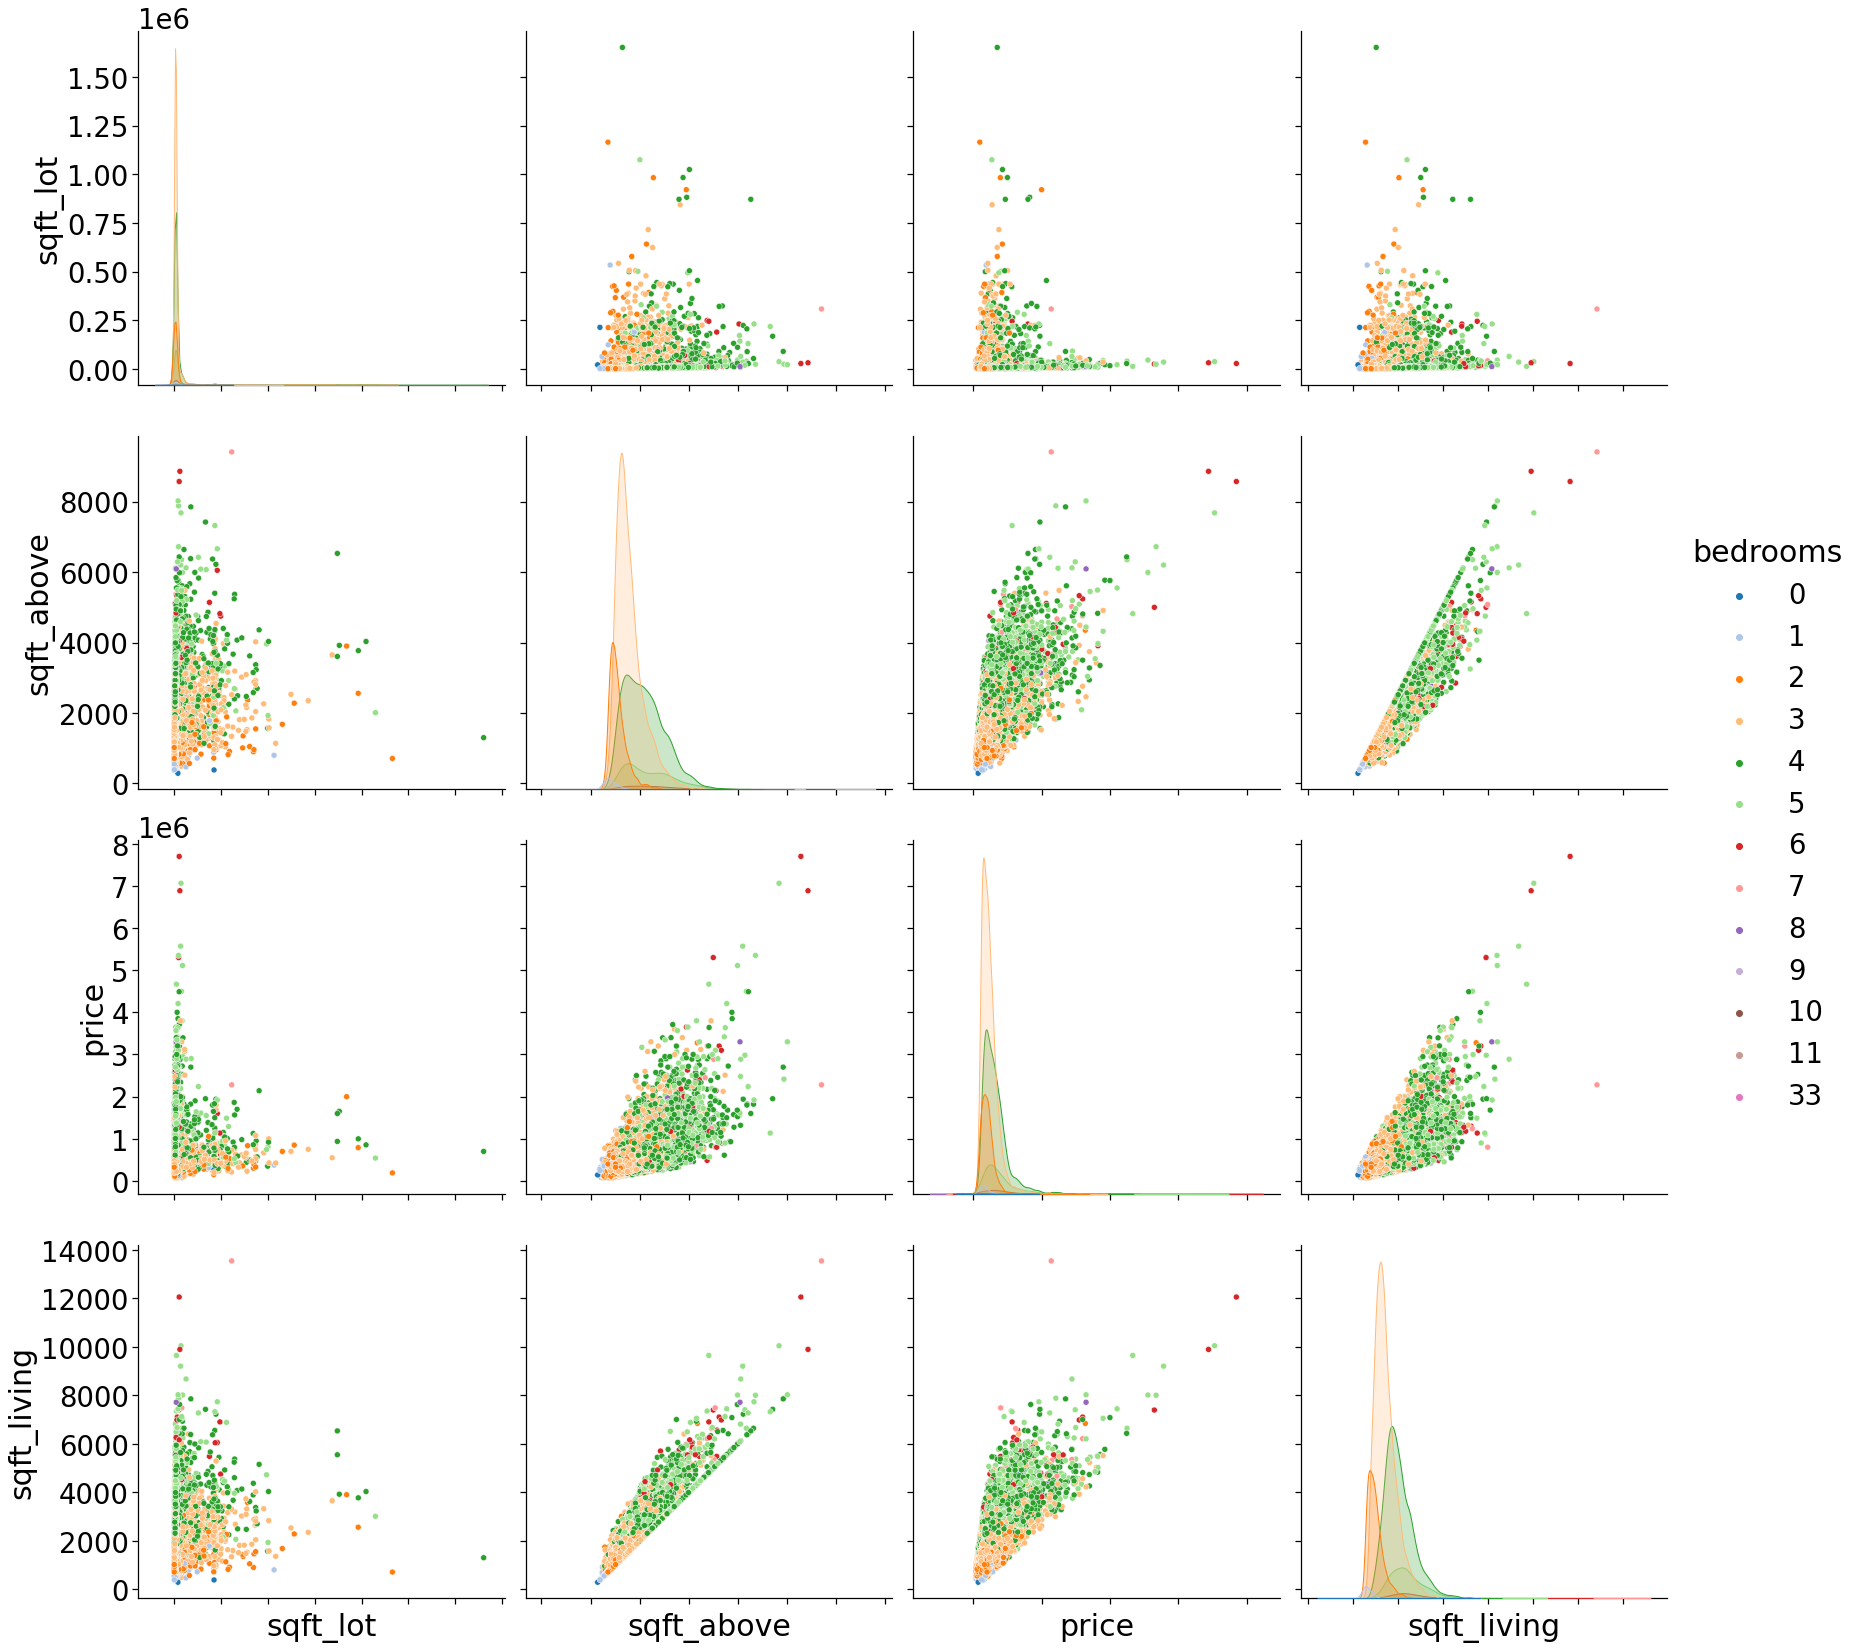

In [10]:
with sb.plotting_context("notebook",font_scale=2.5):
    g = sb.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

D:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


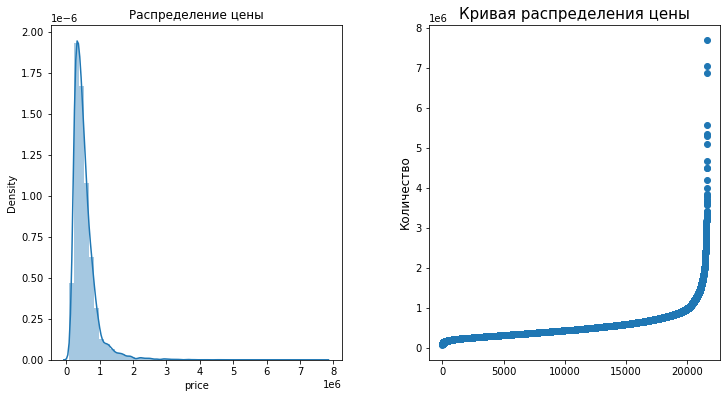

In [11]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Распределение цены')
sb.distplot(df['price'])

plt.subplot(122)
g1 = plt.scatter(range(df.shape[0]), np.sort(df.price.values))
g1= plt.title("Кривая распределения цены", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Количество", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 576x360 with 0 Axes>

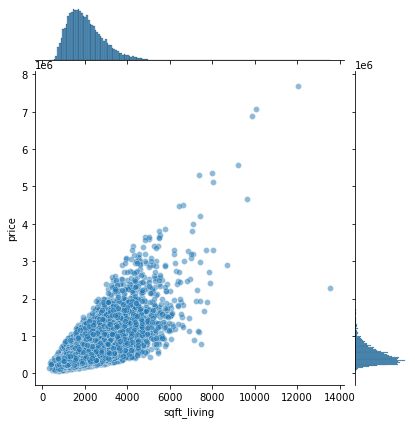

In [12]:
plt.figure(figsize = (8, 5))
sb.jointplot(df.sqft_living, df.price, 
              alpha = 0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

Подсчет состояния: 
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64


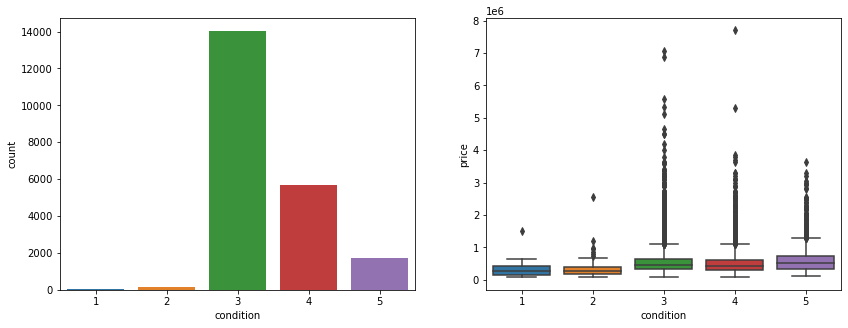

In [13]:
condition = df['condition'].value_counts()

print("Подсчет состояния: ")
print(condition)

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sb.countplot(x='condition', data=df, ax=ax[0])
sb.boxplot(x='condition', y= 'price',
            data=df, ax=ax[1])
plt.show()

D:\Programs\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x576 with 0 Axes>

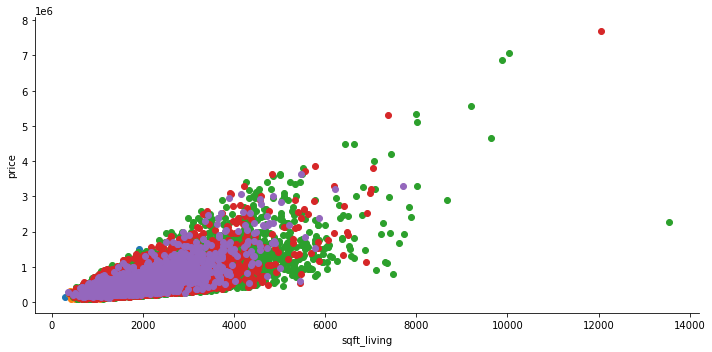

In [14]:
plt.figure(figsize = (12,8))
g = sb.FacetGrid(data=df, hue='condition',size= 5, aspect=2)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

Freuency bathroom description:
2    13851
1     3933
3     2527
4     1201
5       57
6       24
0       14
8        4
7        2
Name: bathrooms, dtype: int64


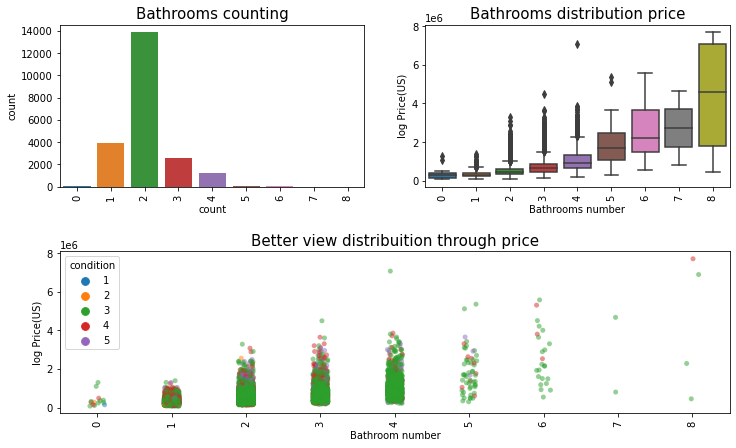

In [15]:
df["bathrooms"] = df['bathrooms'].round(0).astype(int)

print("Freuency bathroom description:")
print(df["bathrooms"].value_counts())

plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sb.countplot(x="bathrooms", data=df,
                    ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Bathrooms counting", fontsize=15)
ax1.set_xlabel("Bathrooms number")
ax1.set_xlabel("count")

ax2 = plt.subplot(222)
ax2 = sb.boxplot(x="bathrooms", y='price',
                  data=df, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Bathrooms distribution price", fontsize=15)
ax2.set_xlabel("Bathrooms number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sb.stripplot(x="bathrooms", y="price",
                    data=df, alpha=0.5,
                    jitter=True, hue="condition")
ax0.set_title("Better view distribuition through price", fontsize=15)
ax0.set_xlabel("Bathroom number")
ax0.set_ylabel("log Price(US)")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)

plt.show()

Mean squared error: 134582326689.42


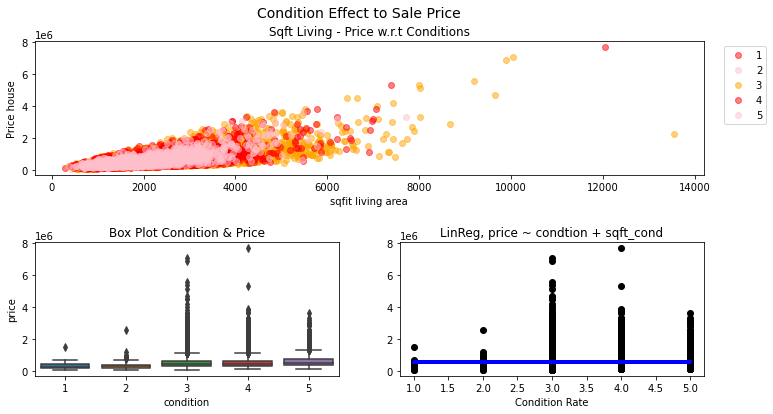

In [16]:
plt.figure(figsize = (12,6))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
ax1.set_prop_cycle(color =['red', 'pink', 'orange'])
# ax1.set_prop_cycle(cycler(color=plt.get_cmap('tab20c').colors))
# ax1.set_prop_cycle(sb.color_palette('hls', 10))
for val in range(1,6,1):
    indeX = df.condition == val
    ax1.scatter(df.sqft_living.loc[indeX], df.price.loc[indeX], label = val, alpha=0.5)
ax1.legend(bbox_to_anchor = [1.1, 1])
ax1.set_xlabel('sqfit living area')
ax1.set_ylabel('Price house')
ax1.set_title('Sqft Living - Price w.r.t Conditions')

ax2 = plt.subplot2grid((2,2), (1,0))
sb.boxplot(x = 'condition', y = 'price', data = df, ax = ax2)
ax2.set_title('Box Plot Condition & Price', fontsize = 12)

ax3 = plt.subplot2grid((2,2), (1,1))
cubicQual = df.groupby(['condition'])['price'].mean().round(0)
testTrain = df.loc[:, ['condition', 'price']].copy()
testTrain['sqCond'] = np.power(testTrain['condition'],2)
mdl = linear_model.LinearRegression()
mdl.fit(testTrain[['condition', 'sqCond']], testTrain['price'])
y_pred = mdl.predict(testTrain[['condition', 'sqCond']])
print("Mean squared error: %.2f" % mean_squared_error(y_pred, testTrain.price))
# Plot outputs
ax3.scatter(testTrain['condition'], testTrain['price'],  color='black')
ax3.plot(testTrain['condition'], y_pred, color='blue', linewidth=3)
ax3.set_title('LinReg, price ~ condtion + sqft_cond', fontsize = 12)
ax3.set_xlabel('Condition Rate')
plt.subplots_adjust(hspace = 0.5, top = 0.9)
plt.suptitle('Condition Effect to Sale Price', fontsize = 14)
plt.show()

Mean squared error: 112971203793.79


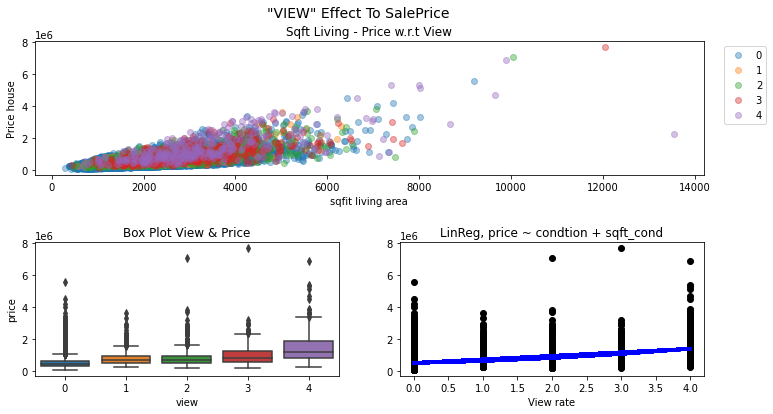

In [17]:
plt.figure(figsize = (12,6))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)

for val in range(0,5,1):
    indeX = df.view == val
    ax1.scatter(df.sqft_living.loc[indeX], df.price.loc[indeX], label = val, alpha=0.4)
ax1.legend(bbox_to_anchor = [1.1, 1])
ax1.set_xlabel('sqfit living area')
ax1.set_ylabel('Price house')
ax1.set_title('Sqft Living - Price w.r.t View')

ax2 = plt.subplot2grid((2,2), (1,0))
sb.boxplot(x = 'view', y = 'price', data = df, ax = ax2)
ax2.set_title('Box Plot View & Price', fontsize = 12)

ax3 = plt.subplot2grid((2,2), (1,1))
cubicV = df.groupby(['view'])['price'].mean().round(0)
testTrain = df.loc[:, ['view', 'price']].copy()
testTrain['sqview'] = np.power(testTrain['view'],2)
mdl = linear_model.LinearRegression()
mdl.fit(testTrain[['view', 'sqview']], testTrain['price'])
y_pred = mdl.predict(testTrain[['view', 'sqview']])
print("Mean squared error: %.2f" % mean_squared_error(y_pred, testTrain.price))
# Plot outputs
ax3.scatter(testTrain['view'], testTrain['price'],  color='black')
ax3.plot(testTrain['view'], y_pred, color='blue', linewidth=3)
ax3.set_title('LinReg, price ~ condtion + sqft_cond', fontsize = 12)
ax3.set_xlabel('View rate')
plt.subplots_adjust(hspace = 0.5, top = 0.9)
plt.suptitle('"VIEW" Effect To SalePrice', fontsize = 14)
plt.show()

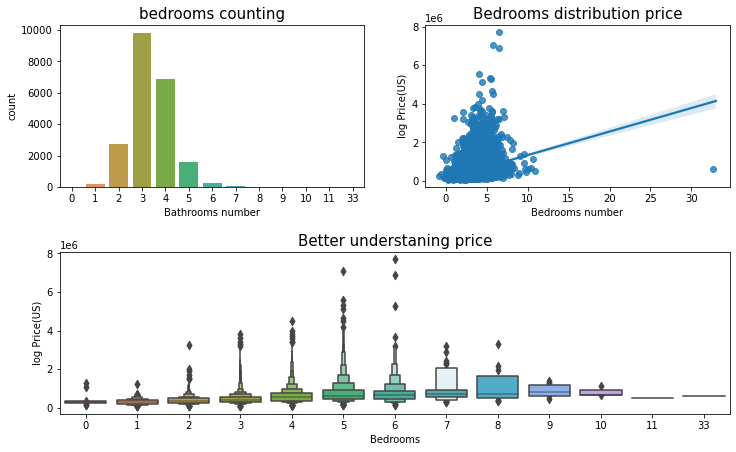

In [18]:
bedrooms = df.bedrooms.value_counts()


plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)


ax1 = plt.subplot(221)
ax1 = sb.countplot(x="bedrooms", data=df,
                    ax=ax1)
ax1.set_title("bedrooms counting", fontsize=15)
ax1.set_xlabel("Bathrooms number")
ax1.set_ylabel("count")

ax2 = plt.subplot(222)
ax2 = sb.regplot(x="bedrooms", y='price', 
                  data=df, ax=ax2, x_jitter=True)
ax2.set_title("Bedrooms distribution price", fontsize=15)
ax2.set_xlabel("Bedrooms number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sb.boxenplot(x="bedrooms", y="price",
                    data=df)
ax0.set_title("Better understaning price", fontsize=15)
ax0.set_xlabel("Bedrooms")
ax0.set_ylabel("log Price(US)")

plt.show()

Floors counting description
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64


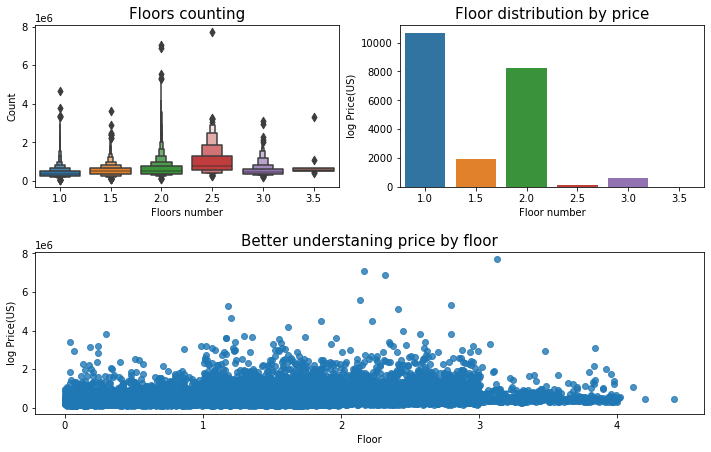

In [19]:
print("Floors counting description")
print(df['floors'].value_counts())


plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sb.boxenplot(x="floors", y='price', 
                    data=df, ax=ax1, )
ax1.set_title("Floors counting", fontsize=15)
ax1.set_xlabel("Floors number")
ax1.set_ylabel("Count")

ax2 = plt.subplot(222)
ax2 = sb.countplot(x="floors",
                  data=df, ax=ax2)
ax2.set_title("Floor distribution by price", fontsize=15)
ax2.set_xlabel("Floor number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sb.regplot(x="floors", y="price", #I need to change floors by sqft_living and hue bye floors
                    data=df, x_jitter=True)
ax0.set_title("Better understaning price by floor", fontsize=15)
ax0.set_xlabel("Floor")
ax0.set_ylabel("log Price(US)")

plt.show()

<Figure size 864x576 with 0 Axes>

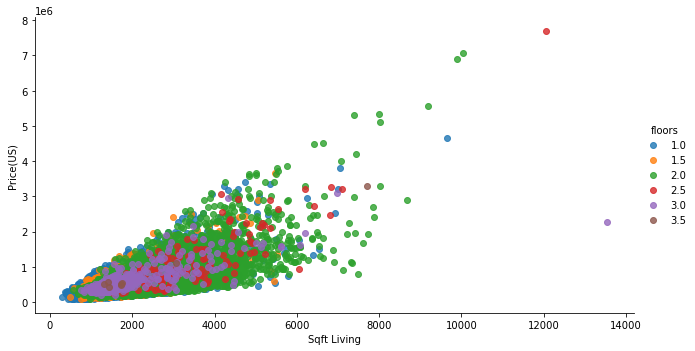

In [20]:
plt.figure(figsize = (12,8))
g=sb.lmplot(x="sqft_living", y="price", aspect=1.8,
                    data=df, hue="floors", fit_reg=False)
g.set_titles("Floors by sqft_living and price", fontsize=15)
g.set_xlabels("Sqft Living")
g.set_ylabels("Price(US)")
plt.show()

Grade counting description
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


C:\Users\kosty\AppData\Local\Temp\ipykernel_21152\2354847940.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)


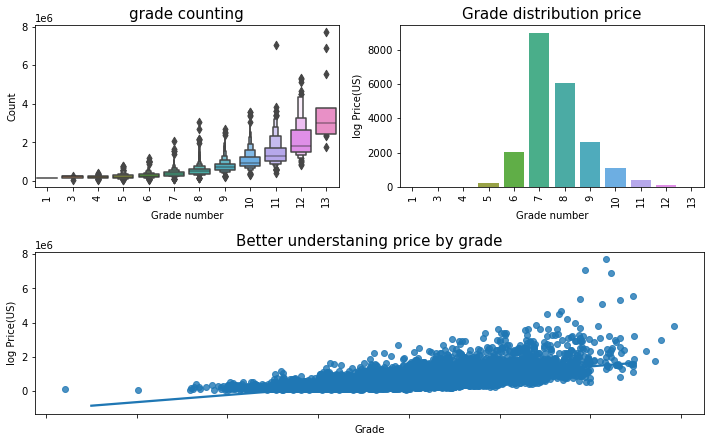

In [21]:
print("Grade counting description")
print(df['grade'].value_counts())


plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sb.boxenplot(x="grade", y='price', 
                    data=df, ax=ax1, )
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("grade counting", fontsize=15)
ax1.set_xlabel("Grade number")
ax1.set_ylabel("Count")

ax2 = plt.subplot(222)
ax2 = sb.countplot(x="grade",
                  data=df, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Grade distribution price", fontsize=15)
ax2.set_xlabel("Grade number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sb.regplot(x="grade", y="price",
                    data=df, x_jitter=True)
ax0.set_title("Better understaning price by grade", fontsize=15)
ax0.set_xlabel("Grade")
ax0.set_ylabel("log Price(US)")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)

plt.show()


## Построим таблицы взаимодействия

In [22]:
bath = ['bathrooms', 'bedrooms']
cm = sb.light_palette("green", as_cmap=True)
pd.crosstab(df[bath[0]], df[bath[1]]).style.background_gradient(cmap = cm)

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
bathrooms,,,,,,,,,,,,,
0,7,4,2,0,1,0,0,0,0,0,0,0,0
1,2,167,1587,1800,327,43,6,1,0,0,0,0,0
2,4,28,1129,7186,4709,695,90,7,1,0,1,0,1
3,0,0,41,656,1219,506,88,7,6,2,1,1,0
4,0,0,1,182,601,321,72,17,4,3,0,0,0
5,0,0,0,0,19,22,12,2,1,0,1,0,0
6,0,0,0,0,6,13,2,2,1,0,0,0,0
7,0,0,0,0,0,1,0,1,0,0,0,0,0
8,0,0,0,0,0,0,2,1,0,1,0,0,0


In [23]:
bath_cond = ['bathrooms', 'condition']
cm = sb.light_palette("green", as_cmap=True)
pd.crosstab(df[bath_cond[0]], df[bath_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
bathrooms,,,,,
0,1,1,9,3,0
1,20,91,2211,1300,311
2,9,75,9000,3702,1065
3,0,5,1713,553,256
4,0,0,1026,109,66
5,0,0,46,8,3
6,0,0,21,3,0
7,0,0,2,0,0
8,0,0,3,1,0


In [24]:
bed_cond = ['bedrooms', 'condition']
cm = sb.light_palette("green", as_cmap=True)
pd.crosstab(df[bed_cond[0]], df[bed_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
bedrooms,,,,,
0,1,1,10,1,0
1,4,11,124,48,12
2,12,51,1779,718,200
3,8,69,6308,2711,728
4,4,36,4580,1682,580
5,0,1,1031,418,151
6,1,3,158,87,23
7,0,0,25,9,4
8,0,0,8,3,2


In [25]:
cond_water = ['condition', 'waterfront']
cm = sb.light_palette("green", as_cmap=True)
pd.crosstab(df[cond_water[0]], df[cond_water[1]]).style.background_gradient(cmap = cm)

waterfront,0,1
condition,,
1,29,1
2,171,1
3,13940,91
4,5629,50
5,1681,20


In [26]:
grade_cond = ['grade', 'condition']
cm = sb.light_palette("green", as_cmap=True)
pd.crosstab(df[grade_cond[0]], df[grade_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
grade,,,,,
1,1,0,0,0,0
3,0,1,1,0,1
4,1,5,13,10,0
5,9,15,100,84,34
6,11,59,1035,685,248
7,6,75,5234,2833,833
8,2,13,4269,1394,390
9,0,2,2041,446,126
10,0,2,921,156,55


In [27]:
grade_bed = ['grade', 'bedrooms']
cm = sb.light_palette("green", as_cmap=True)
pd.crosstab(df[grade_bed[0]], df[grade_bed[1]]).style.background_gradient(cmap = cm)

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
grade,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,0,0,0,0,0,0,0,0,0
4,2,12,14,1,0,0,0,0,0,0,0,0,0
5,0,37,114,62,21,5,3,0,0,0,0,0,0
6,0,78,824,854,233,41,7,1,0,0,0,0,0
7,6,52,1205,4917,2177,501,98,11,6,4,2,1,1
8,3,14,499,2796,2194,455,90,12,4,1,0,0,0
9,0,2,78,832,1351,313,33,4,1,0,1,0,0
10,0,1,21,296,615,173,22,5,1,0,0,0,0


In [28]:
grade_bath = ['grade', 'bathrooms']
cm = sb.light_palette("green", as_cmap=True)
pd.crosstab(df[grade_bath[0]], df[grade_bath[1]]).style.background_gradient(cmap = cm)

bathrooms,0,1,2,3,4,5,6,7,8
grade,,,,,,,,,
1,1,0,0,0,0,0,0,0,0
3,2,1,0,0,0,0,0,0,0
4,0,28,1,0,0,0,0,0,0
5,1,204,36,1,0,0,0,0,0
6,2,1441,574,18,3,0,0,0,0
7,4,2104,6216,575,75,6,0,0,1
8,3,145,4788,882,244,4,2,0,0
9,0,9,1671,629,303,3,0,0,0
10,0,0,480,309,333,11,1,0,0


Построим корреляционную матрицу, основанную на таблицах выше

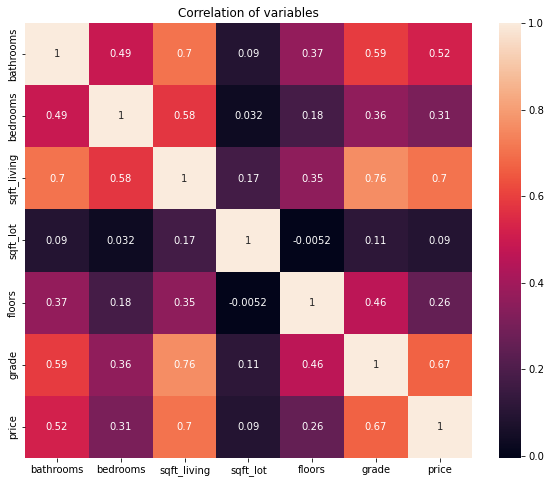

In [29]:
corr = df[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sb.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

На корреляционной матрице видно, что, в основном, все переменные связаны между собой. "Лишних" признаков тоже не наблюдается.

## Рассмотрим распределение по годам постройки

D:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yr_built', ylabel='Density'>

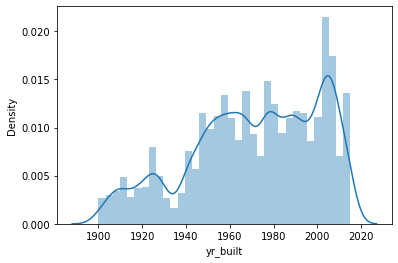

In [30]:
sb.distplot(df['yr_built'])

D:\Programs\Anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Programs\Anaconda\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


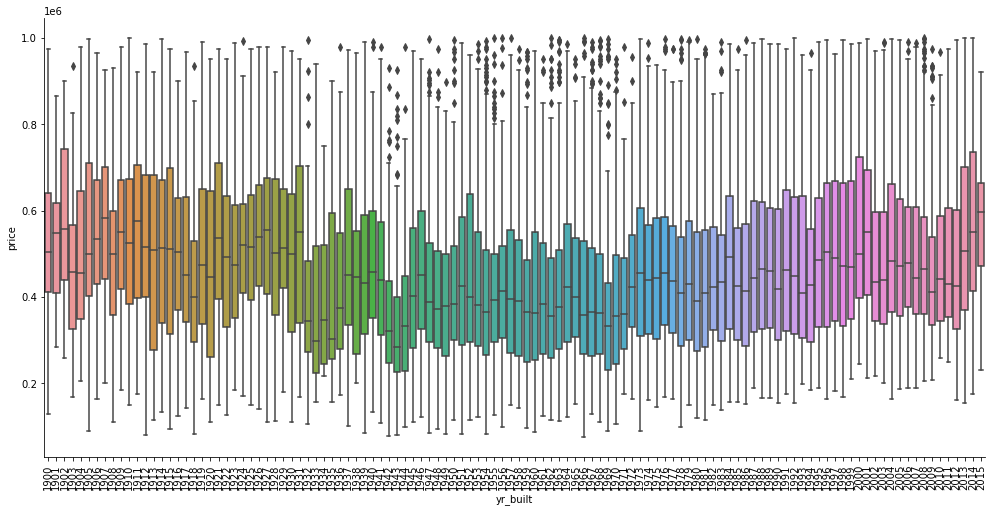

In [31]:
g = sb.factorplot(x="yr_built", y = "price", data=df[df['price'] < 1000000], 
                   size= 7, aspect = 2, kind="box" )
g.set_xticklabels(rotation=90)
plt.show()

## корреляционная матрица

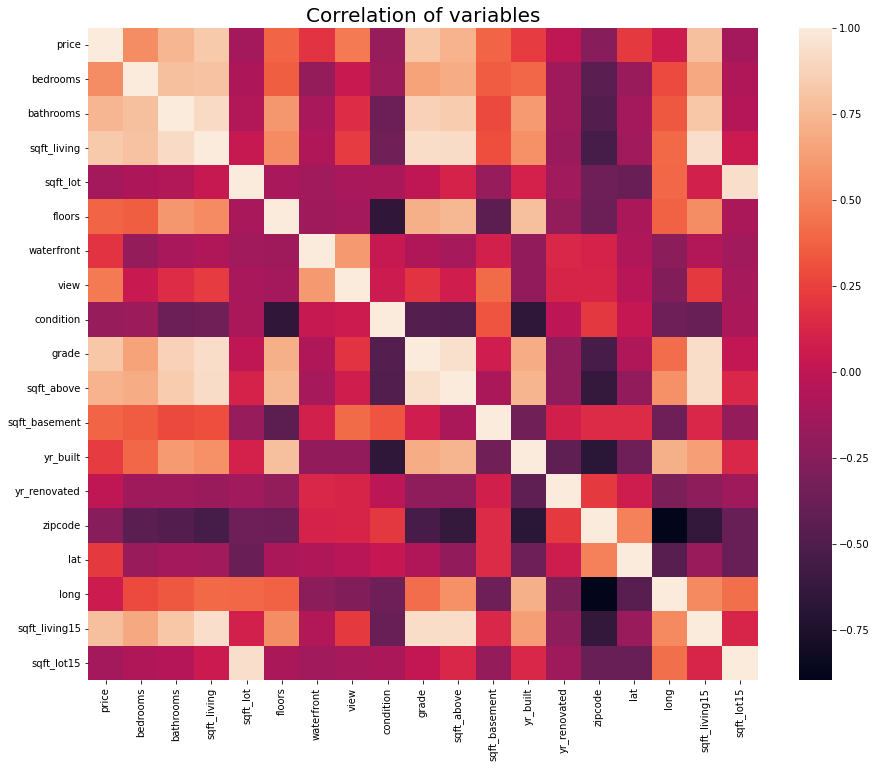

In [32]:
plt.figure(figsize=(15,12))
plt.title('Correlation of variables', fontsize=20)
sb.heatmap(df.corr().astype(float).corr(),vmax=1.0)
plt.show()

### Генерация и селекция признаков + нормализация

In [33]:
X = df.drop("price",axis=1).values
y = df["price"].values


In [34]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

## Выбор метода/алгоритма, модели, архитектуры (для НС)
Я выбрал XGBR и RandomForest для построенния регрессии

импортируем нужные библиотеки и функции

In [35]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

D:\Programs\Anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Сравним оба метода с R^2

In [36]:
thresh = 5 * 10**(-3)
model = XGBRegressor()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# eval model
select_X_val = selection.transform(X_test)
# test 
select_X_test = selection.transform(X_test)

In [37]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 
pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                ))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)


Scaled_XGB_reg: 0.880429 (+/- 0.016605)
Scaled_RF_reg: 0.872498 (+/- 0.019361)


Text(0, 0.5, 'R Squared Score of Models')

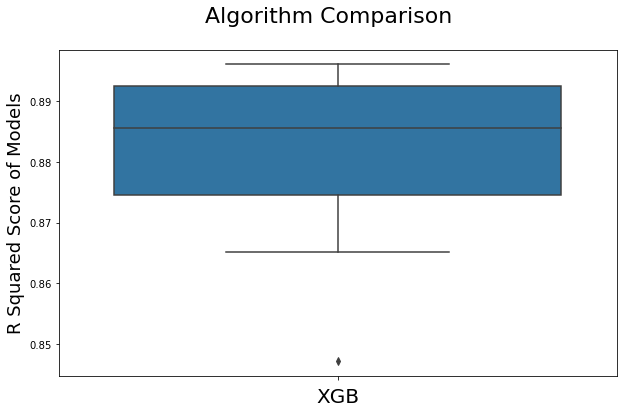

In [38]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sb.boxplot(y=results[0])
ax.set_xlabel("XGB", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)


Text(0, 0.5, 'R Squared Score of Models')

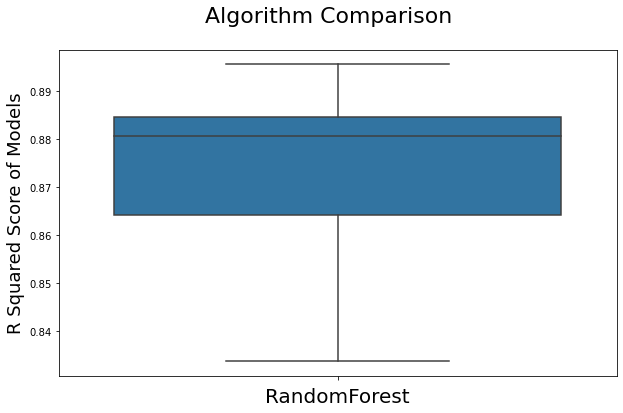

In [39]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sb.boxplot(y=results[1])
ax.set_xlabel("RandomForest", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)

Наши модели показали неплохие результаты относительно R^2.
 
 Теперь соберём их

In [40]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [41]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
y_hat = xgb.predict(X_test)

In [43]:
xgb.score(X_test,y_test)

0.8935676948658282

In [44]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=42, verbose=2)

In [46]:
rf_random.best_params_

{'n_estimators': 157,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [47]:
y_hat_Search = rf_random.predict(X_test)

In [48]:
print("XGBoost Regressor R2-score: {}".format(round(r2_score(y_hat, y_test),4)))
print("RandomForest Regressor Prediction R2-score: {}".format(round(r2_score(y_hat_Search, y_test),4)))
print("\nMSE of XGBoost Regressor: {}".format(median_absolute_error(y_hat, y_test)))
print("MSE of RandomForest Regressor: {} ".format(median_absolute_error(y_hat_Search, y_test)))

XGBoost Regressor R2-score: 0.8719
RandomForest Regressor Prediction R2-score: 0.8649

MSE of XGBoost Regressor: 40627.984375
MSE of RandomForest Regressor: 39106.26542816672 


## 12. Выводы

- EDA (exploratory data analysis). Это не очень большие данные, и у нас не так много функций. Таким образом, у нас есть шанс построить большинство из них и получить некоторые полезные аналитические результаты. Рисование диаграмм и изучение данных перед применением модели — очень хорошая практика, потому что мы можем обнаружить некоторые возможные выбросы или принять решение о нормализации. Еще один важный момент — корреляция. Если существует очень высокая корреляция между двумя функциями, сохранение их обоих в большинстве случаев не является хорошей идеей, чтобы не вызвать переоснащение. Например, если есть переоснащение, мы можем удалить sqt_above или sqt_living, потому что они сильно коррелированы. Это отношение можно оценить, когда мы посмотрим на определения в наборе данных, но для уверенности следует проверить матрицу корреляции. Однако это не означает, что вы должны удалить одну из сильно коррелированных функций. Например: ванные комнаты и sqrt_living. Они сильно коррелированы, но я не думаю, что отношение между ними такое же, как отношение между sqt_living и sqt_above.

- Data Cleaning — Существует очень мало домов, которые имеют некоторые странные характеристики, или цена кажется далекой от других, например, 33 спальни или цена около 7000000. Однако определение их возможного негативного эффекта займет много времени и в реальных наборах данных в этом наборе данных всегда будут некоторые выбросы, такие как цены на элитное жилье. Вот почему я не удалял выбросы.

- Models
  - XGB
  - RandomForest
  
  